In [2]:
from gurobipy import Model, GRB, quicksum
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
dataC = pd.read_csv("customer.csv")

In [4]:
dataF = pd.read_csv("facility.csv")

In [5]:
xc = dataC['X'].tolist()
yc = dataC['Y'].tolist()
h  = dataC['Demand'].tolist()
n  = len(h)

In [6]:
xf = dataF['X'].tolist()
yf = dataF['Y'].tolist()
f  = dataF['Installation cost'].tolist()
m  = len(f)

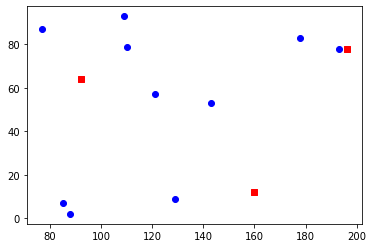

In [8]:
I = [i for i in range(0,n)]
J = [j for j in range(0,m)]
A = [(i,j) for i in I for j in J]

#Transportation cost is $1/mile
c = {(i,j): 1*np.hypot(xc[i]-xf[j], yc[i]- yf[j]) for (i,j) in A}

In [9]:
c

{(0, 0): 86.00581375697809,
 (0, 1): 83.60023923410746,
 (0, 2): 23.430749027719962,
 (1, 0): 58.60034129593445,
 (1, 1): 44.384682042344295,
 (1, 2): 52.172789842982326,
 (2, 0): 77.88452991448301,
 (2, 1): 59.54829972383762,
 (2, 2): 29.832867780352597,
 (3, 0): 88.28363381737297,
 (3, 1): 95.71833680126291,
 (3, 2): 33.61547262794322,
 (4, 0): 131.76494222667878,
 (4, 1): 75.16648189186454,
 (4, 2): 57.42821606144492,
 (5, 0): 96.17692030835673,
 (5, 1): 31.144823004794873,
 (5, 2): 66.2872536767062,
 (6, 0): 132.06059215375342,
 (6, 1): 72.69112738154499,
 (6, 2): 62.12889826803627,
 (7, 0): 18.681541692269406,
 (7, 1): 73.24616030891995,
 (7, 2): 88.07383266328314,
 (8, 0): 3.0,
 (8, 1): 73.79024325749306,
 (8, 2): 101.96568050084302,
 (9, 0): 119.33985084622823,
 (9, 1): 111.8659912573969,
 (9, 2): 27.459060435491963}

In [10]:
from gurobipy import Model, GRB, quicksum

In [11]:
mdl = Model('UFLP')

Academic license - for non-commercial use only - expires 2022-08-28
Using license file C:\Users\HP\gurobi.lic


In [12]:
x = mdl.addVars(J, vtype = GRB.BINARY)
y = mdl.addVars(A, vtype = GRB.CONTINUOUS )

In [17]:
mdl.setObjective(quicksum(f[j]*x[j] for j  in J) + quicksum(h[i]*c[i,j]*y[i,j] for i,j in A), GRB.MINIMIZE)

In [29]:
mdl.addConstrs(quicksum(y[i,j] for j in J) == 1 for i in I)
mdl.addConstrs(y[i,j] <= x[j] for i,j in A)
mdl.addConstrs(y[i,j] >= 0 for i,j in A)

{(0, 0): <gurobi.Constr *Awaiting Model Update*>,
 (0, 1): <gurobi.Constr *Awaiting Model Update*>,
 (0, 2): <gurobi.Constr *Awaiting Model Update*>,
 (1, 0): <gurobi.Constr *Awaiting Model Update*>,
 (1, 1): <gurobi.Constr *Awaiting Model Update*>,
 (1, 2): <gurobi.Constr *Awaiting Model Update*>,
 (2, 0): <gurobi.Constr *Awaiting Model Update*>,
 (2, 1): <gurobi.Constr *Awaiting Model Update*>,
 (2, 2): <gurobi.Constr *Awaiting Model Update*>,
 (3, 0): <gurobi.Constr *Awaiting Model Update*>,
 (3, 1): <gurobi.Constr *Awaiting Model Update*>,
 (3, 2): <gurobi.Constr *Awaiting Model Update*>,
 (4, 0): <gurobi.Constr *Awaiting Model Update*>,
 (4, 1): <gurobi.Constr *Awaiting Model Update*>,
 (4, 2): <gurobi.Constr *Awaiting Model Update*>,
 (5, 0): <gurobi.Constr *Awaiting Model Update*>,
 (5, 1): <gurobi.Constr *Awaiting Model Update*>,
 (5, 2): <gurobi.Constr *Awaiting Model Update*>,
 (6, 0): <gurobi.Constr *Awaiting Model Update*>,
 (6, 1): <gurobi.Constr *Awaiting Model Update*>,


In [30]:
mdl.optimize()

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 200 rows, 33 columns and 360 nonzeros
Model fingerprint: 0xbc518123
Variable types: 30 continuous, 3 integer (3 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [3e+00, 8e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Presolve removed 160 rows and 0 columns
Presolve time: 0.04s
Presolved: 40 rows, 33 columns, 90 nonzeros
Variable types: 30 continuous, 3 integer (3 binary)

Root relaxation: objective 1.535286e+03, 4 iterations, 0.04 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0               0    1535.2857629 1535.28576  0.00%     -    0s

Explored 0 nodes (4 simplex iterations) in 0.42 seconds
Thread count was 4 (of 4 available processors)

Solution 

In [31]:
sol_x = {j: x[j] for j in J}

In [32]:
sol_x

{0: <gurobi.Var C0 (value 1.0)>,
 1: <gurobi.Var C1 (value 1.0)>,
 2: <gurobi.Var C2 (value 1.0)>}

In [34]:
sol_y = {(i,j): y[i,j] for i,j in A}
sol_y

{(0, 0): <gurobi.Var C3 (value 0.0)>,
 (0, 1): <gurobi.Var C4 (value 0.0)>,
 (0, 2): <gurobi.Var C5 (value 1.0)>,
 (1, 0): <gurobi.Var C6 (value 0.0)>,
 (1, 1): <gurobi.Var C7 (value 1.0)>,
 (1, 2): <gurobi.Var C8 (value 0.0)>,
 (2, 0): <gurobi.Var C9 (value 0.0)>,
 (2, 1): <gurobi.Var C10 (value 0.0)>,
 (2, 2): <gurobi.Var C11 (value 1.0)>,
 (3, 0): <gurobi.Var C12 (value 0.0)>,
 (3, 1): <gurobi.Var C13 (value 0.0)>,
 (3, 2): <gurobi.Var C14 (value 1.0)>,
 (4, 0): <gurobi.Var C15 (value 0.0)>,
 (4, 1): <gurobi.Var C16 (value 0.0)>,
 (4, 2): <gurobi.Var C17 (value 1.0)>,
 (5, 0): <gurobi.Var C18 (value 0.0)>,
 (5, 1): <gurobi.Var C19 (value 1.0)>,
 (5, 2): <gurobi.Var C20 (value 0.0)>,
 (6, 0): <gurobi.Var C21 (value 0.0)>,
 (6, 1): <gurobi.Var C22 (value 0.0)>,
 (6, 2): <gurobi.Var C23 (value 1.0)>,
 (7, 0): <gurobi.Var C24 (value 1.0)>,
 (7, 1): <gurobi.Var C25 (value 0.0)>,
 (7, 2): <gurobi.Var C26 (value 0.0)>,
 (8, 0): <gurobi.Var C27 (value 1.0)>,
 (8, 1): <gurobi.Var C28 (value 

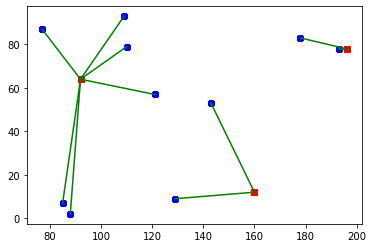

In [47]:
assignment = {a for a in A if y[a].X>0}

for i,j in assignment:
    plt.plot([xc[i], xf[j]], [yc[i], yf[j]], c='g')
    plt.scatter(xc,yc,c="blue")
    plt.scatter(xf,yf,c="red", marker="s")

In [45]:
[xc[1], xf[1]]

[143, 160]